# Sheet 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

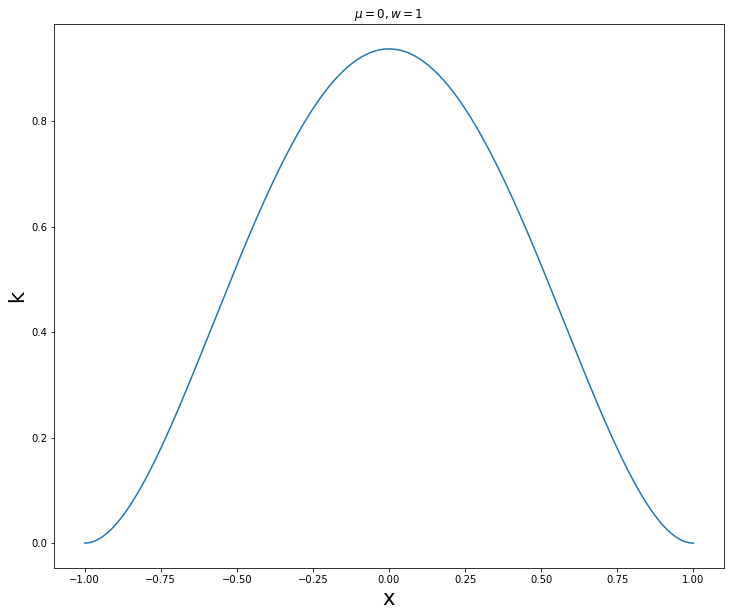

In [13]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel

    ##we are providing x as a form of array
    return (15./16*w)*(1-((x-mu)/w)**2)**2

x = np.linspace(-1,1,1000)

kernel = np.array([biweight(x,mu = 0,w = 1)]).reshape(1000)
plt.figure(figsize = (12,10))
plt.title(r'$\mu = 0,w = 1$')
plt.plot(x,kernel)
plt.xlabel('x',fontsize = 21)
plt.ylabel('k',fontsize = 21)

plt.show()



In [ ]:
# TODO plot the kernel

(b)

In [ ]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

In [ ]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel

In [ ]:
# TODO: compute and plot the kde on the first 50 data points

# TODO: explore what happens when you increase the number of points


## 3 Mean-Shift
(b) Bonus

In [ ]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: compute a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    
    # TODO: threshold the distances with r to get an array of masks for every data point
    
    # TODO: compute the number of points in x within radius r of each xt
    
    # TODO: compute the local means by summing over the neighbors of each element in xt 
    #       and dividing by the number of neighbors
    
    return local_means
    

In [ ]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories


In [3]:
# TODO: repeat the above for "blurring" mean shift


## 4 K-Means

(b)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[1] == k
        
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=, 
        init=, 
        max_iter=,
        n_init=,
    )
    
    # TODO call the single_step_kmeans
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = 
    
    # TODO read out cluster centers 
    c = 
    
    return E, c 
    

In [ ]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')

In [ ]:
def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, c = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies


for k in [3, 5, 10, 20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectores
        